# Best Streaming Service Analysis With Python

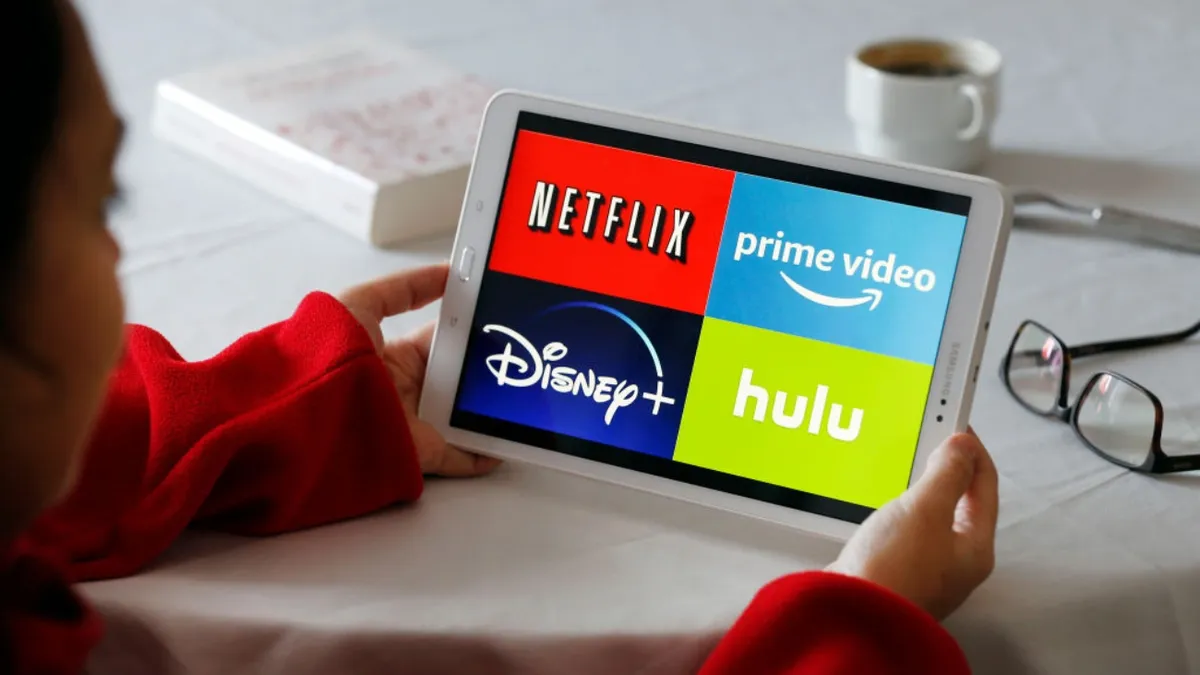

 In this project, we will analyse the main streamming services like Netflix, Amazon Prime Video, Disney+ and Hulu.

## Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

## Importing the dataset:

In [2]:
df=pd.read_csv('moviestreams.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
# Shape of the dataset:

df.shape

(16744, 17)

In [4]:
# Column names in the dataset:

cols=list(df.columns)
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [5]:
# Drop irrelevant columns:

df.drop(['Unnamed: 0','ID'], axis=1, inplace=True)

cols=list(df.columns)
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

## Data Cleaning:

In [6]:
# Datatypes of all columns:

df.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

#### Let's remove '+' sign attached to the values in the  "Age" column

In [7]:
df['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [8]:
df['age']=df['Age'].map({'13+':13, '18+':18, '7+':7, 'all':0 ,'16+':16})
df['age'].dtypes

dtype('float64')

#### Let's remove '%' sign attached to the values in the "Rotten Tomatoes" column

In [9]:
df["Rotten_Tomatoes"]=df["Rotten Tomatoes"].str.replace('%','')
df["Rotten_Tomatoes"].dtypes

dtype('O')

In [10]:
df["Rotten_Tomatoes"]=pd.to_numeric(df["Rotten_Tomatoes"])
df["Rotten_Tomatoes"].dtypes

dtype('float64')

## Dataset for each streaming platform:

### 1. Netflix:

In [11]:
# Netflix:
netflix_df=df[df['Netflix']==1]
netflix_df.head(3)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,age,Rotten_Tomatoes
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0,87.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0,87.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0,84.0


#### Count function for Netflix:

In [12]:
def cnt_netflix(column):
    netflix_df[column]=netflix_df[column].astype(str)
    dic=dict()
    lis=list(netflix_df[column])
    for i in lis:
        x=i.split(',')
    
        for j in x:
            if j in dic.keys():
                dic[j]+=1
            else:
                dic[j]=1
                
    
    count=pd.DataFrame(dic.items(), columns=[column,'counts'])
    count.sort_values(by='counts', ascending=False, inplace=True)
    count=count.head(10)
    
    plt.title('Top '+column+' in Netflix')
    return sns.barplot(x='counts', y=column, data=count, color='red')

### 2. Hulu:

In [13]:
# Hulu:
hulu_df=df[df['Hulu']==1]
hulu_df.head(3)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,age,Rotten_Tomatoes
67,Blackfish,2013,13+,8.1,98%,1,1,0,0,0,Gabriela Cowperthwaite,"Documentary,News",United States,"English,Spanish",83.0,13.0,98.0
97,Jiro Dreams of Sushi,2011,7+,7.9,99%,1,1,0,0,0,David Gelb,Documentary,United States,Japanese,81.0,7.0,99.0
146,The Patriot,2000,18+,7.2,61%,1,1,0,0,0,Roland Emmerich,"Action,Drama,History,War","United States,Germany","English,French",165.0,18.0,61.0


#### Count function for Hulu:

In [14]:
def cnt_hulu(column):
    hulu_df[column]=hulu_df[column].astype(str)
    dic=dict()
    lis=list(hulu_df[column])
    for i in lis:
        x=i.split(',')
    
        for j in x:
            if j in dic.keys():
                dic[j]+=1
            else:
                dic[j]=1
                
    
    count=pd.DataFrame(dic.items(), columns=[column,'counts'])
    count.sort_values(by='counts', ascending=False, inplace=True)
    count=count.head(10)
    
    plt.title('Top '+column+' in Hulu')
    return sns.barplot(x='counts', y=column, data=count, color='lightgreen')

### 3. Prime Video:

In [15]:
# Prime Video:
prime_df=df[df['Prime Video']==1]
prime_df.head(3)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,age,Rotten_Tomatoes
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0,97.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,18.0,95.0
11,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0,13.0,100.0


#### Count function for Prime Video:

In [16]:
def cnt_prime(column):
    prime_df[column]=prime_df[column].astype(str)
    dic=dict()
    lis=list(prime_df[column])
    for i in lis:
        x=i.split(',')
    
        for j in x:
            if j in dic.keys():
                dic[j]+=1
            else:
                dic[j]=1
                
    
    count=pd.DataFrame(dic.items(), columns=[column,'counts'])
    count.sort_values(by='counts', ascending=False, inplace=True)
    count=count.head(10)
    
    plt.title('Top '+column+' in Prime Video')
    return sns.barplot(x='counts', y=column, data=count, color='lightblue', saturation=1)

### 4. Disney+:

In [17]:
# Disney+:
disney_df=df[df['Disney+']==1]
disney_df.head(3)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,age,Rotten_Tomatoes
95,Saving Mr. Banks,2013,13+,7.5,79%,1,0,0,1,0,John Lee Hancock,"Biography,Comedy,Drama","United States,United Kingdom,Australia",English,125.0,13.0,79.0
103,Amy,2015,18+,7.8,95%,1,0,1,1,0,NaN,Drama,United States,English,60.0,18.0,95.0
122,Bolt,2008,7+,6.8,89%,1,0,0,1,0,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96.0,7.0,89.0


#### Count function for Disney+:

In [18]:
def cnt_disney(column):
    disney_df[column]=disney_df[column].astype(str)
    dic=dict()
    lis=list(disney_df[column])
    for i in lis:
        x=i.split(',')
    
        for j in x:
            if j in dic.keys():
                dic[j]+=1
            else:
                dic[j]=1
                
    
    count=pd.DataFrame(dic.items(), columns=[column,'counts'])
    count.sort_values(by='counts', ascending=False, inplace=True)
    count=count.head(10)
    
    plt.title('Top '+column+' in Disney+')
    return sns.barplot(x='counts', y=column, data=count, color='darkblue')

## Data Visualization:

## 1. Language:

### Top 20 Languages in all platforms:

In [19]:
df['Language']=df['Language'].astype(str)

In [20]:
lang_dic=dict()
lang_list=list(df['Language'])

for i in lang_list:
    x=i.split(',')
    
    for j in x:
        if j in lang_dic.keys():
            lang_dic[j]+=1
        else:
            lang_dic[j]=1
            

In [21]:
langcount=pd.DataFrame(lang_dic.items(), columns=['Language','counts'])
langcount.sort_values(by='counts', ascending=False, inplace=True)
langcount.drop(58, axis=0, inplace=True)
langcount=langcount.head(20)
langcount

,Language,counts
0,English,13233
4,Spanish,872
2,French,799
10,Hindi,731
5,German,483
3,Italian,440
24,Mandarin,352
1,Japanese,317
6,Russian,222
8,Arabic,190


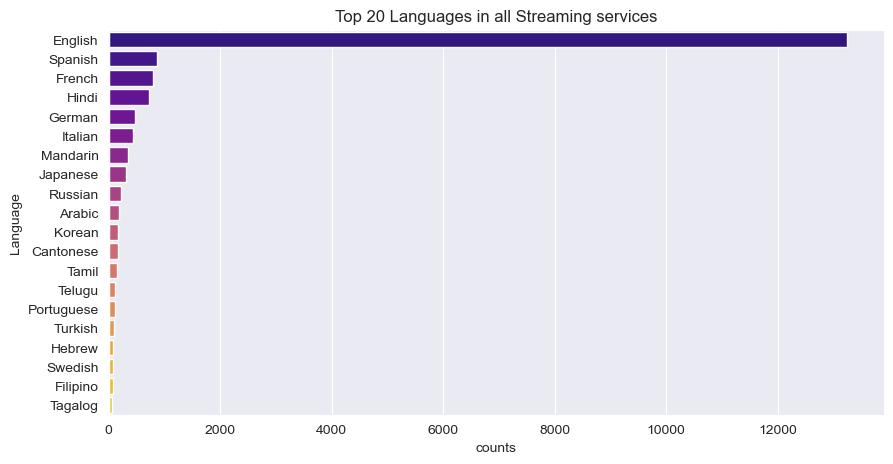

In [22]:
plt.figure(figsize=(10,5))
plt.title('Top 20 Languages in all Streaming services')
sns.barplot(x='counts', y='Language', data=langcount, palette='plasma')
plt.show()

### Top 10 Language in each streaming platform:

C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\38901643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df[column]=netflix_df[column].astype(str)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\1775973053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df[column]=hulu_df[column].astype(str)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\3765960614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

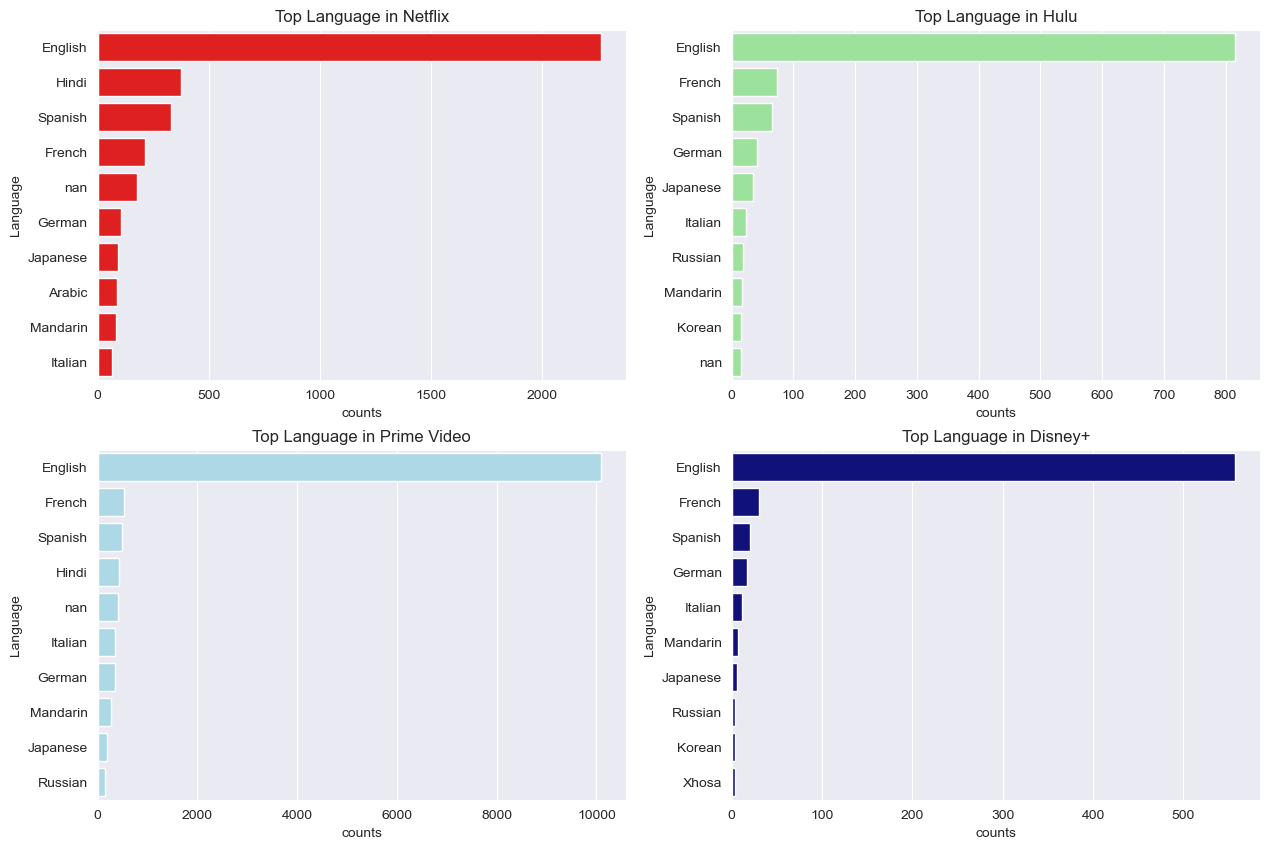

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(221)
cnt_netflix('Language')

plt.subplot(222)
cnt_hulu('Language')

plt.subplot(223)
cnt_prime('Language')

plt.subplot(224)
cnt_disney('Language')

plt.show()

Avoid nan in each Graph (Don't consider nan)

## 2. Age:

### Number of movies for each age groups in all Platforms:

In [24]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

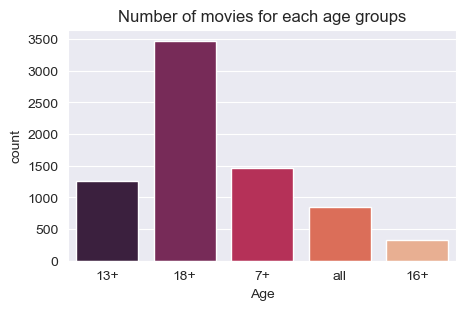

In [25]:
plt.figure(figsize=(5,3))
plt.title('Number of movies for each age groups')
sns.countplot(x='Age', data=df, palette='rocket')
plt.show()

### Number of movies in specific age group in each platform:

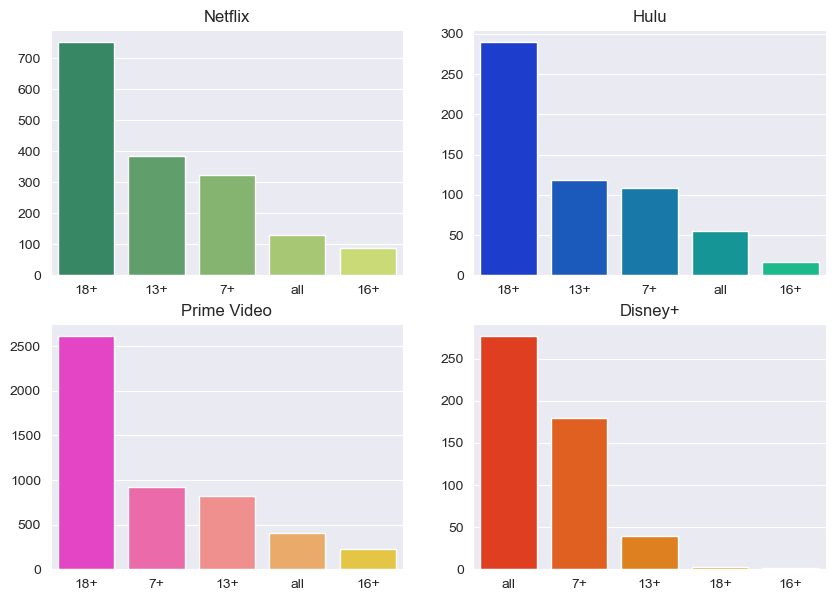

In [26]:
plt.figure(figsize=(10,7))

# Netflix:
plt.subplot(221)
plt.title('Netflix')
sns.barplot(x=df[df['Netflix']==1]['Age'].value_counts().index,
            y=df[df['Netflix']==1]['Age'].value_counts().values,
           palette='summer')

# Hulu:
plt.subplot(222)
plt.title('Hulu')
sns.barplot(x=df[df['Hulu']==1]['Age'].value_counts().index,
            y=df[df['Hulu']==1]['Age'].value_counts().values,
           palette='winter')

# Prime Video:
plt.subplot(223)
plt.title('Prime Video')
sns.barplot(x=df[df['Prime Video']==1]['Age'].value_counts().index,
            y=df[df['Prime Video']==1]['Age'].value_counts().values,
           palette='spring')

# Disney+:
plt.subplot(224)
plt.title('Disney+')
sns.barplot(x=df[df['Disney+']==1]['Age'].value_counts().index,
            y=df[df['Disney+']==1]['Age'].value_counts().values,
           palette='autumn')

plt.show()

## 3. Ratings:

### Rotten Tomato Ratings :

Rotten Tomatoes is an American review-aggregation website for film and television.

If the movie or TV show gets a rating of 60 or more, it gets fresh red tomato on the site. If it gets less than 60, than it gets a rotten tomato.

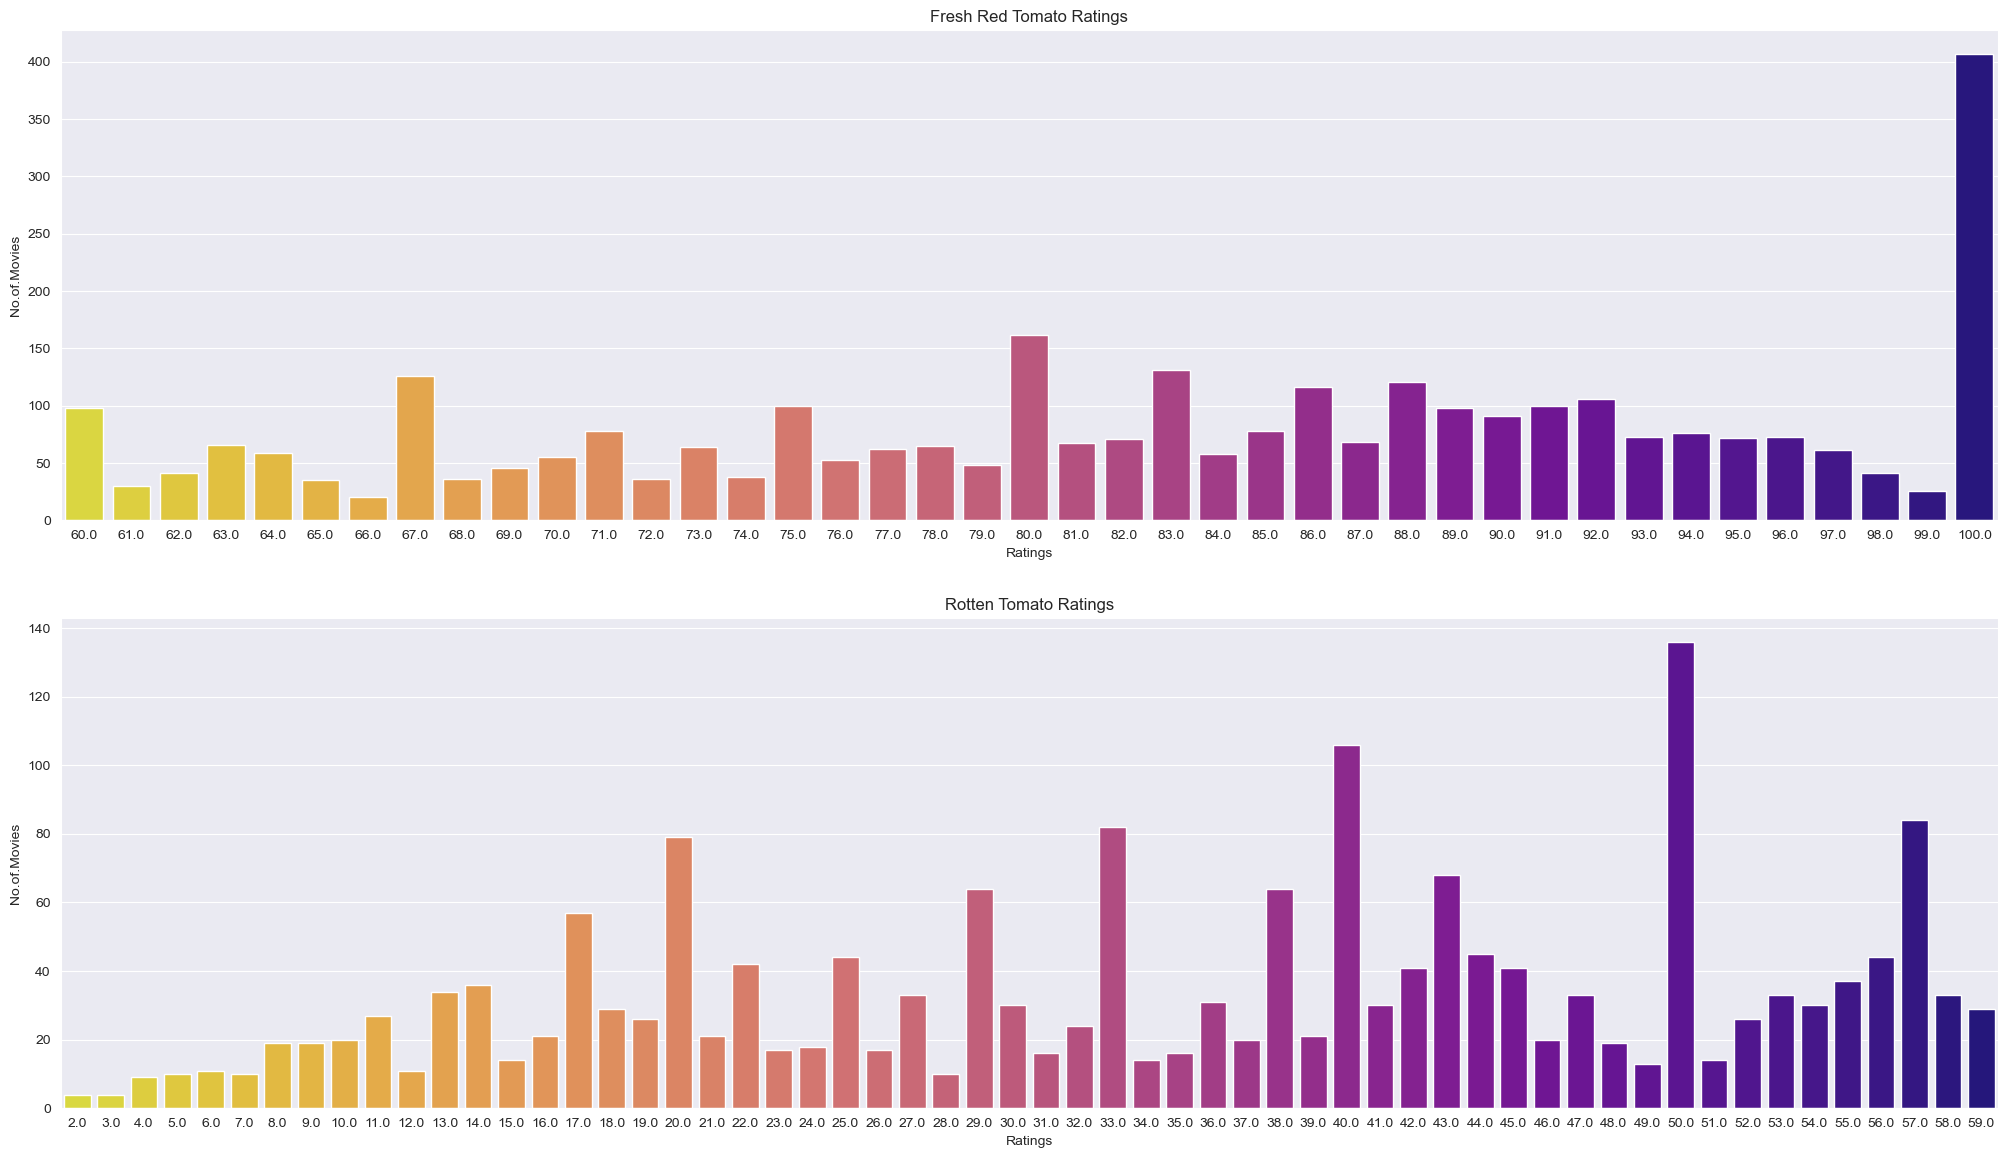

In [27]:
plt.figure(figsize=(25,14))

# Fresh Red Tomato:
plt.subplot(211)

plt.xlabel('Ratings')
plt.ylabel('No.of.Movies')
plt.title("Fresh Red Tomato Ratings")

sns.barplot(x=df[df['Rotten_Tomatoes']>=60.0]['Rotten_Tomatoes'].value_counts().index, 
            y=df[df['Rotten_Tomatoes']>=60.0]['Rotten_Tomatoes'].value_counts().values,
           palette='plasma_r')


# Rotten Tomato:
plt.subplot(212)

plt.xlabel('Ratings')
plt.ylabel('No.of.Movies')
plt.title("Rotten Tomato Ratings")

sns.barplot(x=df[df['Rotten_Tomatoes']<60.0]['Rotten_Tomatoes'].value_counts().index, 
            y=df[df['Rotten_Tomatoes']<60.0]['Rotten_Tomatoes'].value_counts().values,
           palette='plasma_r')


plt.show()

### Fresh_Red_Tomato and Rotten_Tomato Ratings for each platform:

In [28]:
x=[['Netflix',df[(df['Netflix']==1) & (df['Rotten_Tomatoes']>=60.0)]['Netflix'].count()],
  ['Hulu',df[(df['Hulu']==1) & (df['Rotten_Tomatoes']>=60.0)]['Hulu'].count()],
   ['Prime Video',df[(df['Prime Video']==1) & (df['Rotten_Tomatoes']>=60.0)]['Prime Video'].count()],
   ['Disney+',df[(df['Disney+']==1) & (df['Rotten_Tomatoes']>=60.0)]['Disney+'].count()]]

fresh_red_tomato=pd.DataFrame(x,columns=['Platform','No.of.Movies'])

fresh_red_tomato

,Platform,No.of.Movies
0,Netflix,905
1,Hulu,423
2,Prime Video,1897
3,Disney+,210


In [29]:
y=[['Netflix',df[(df['Netflix']==1) & (df['Rotten_Tomatoes']<60.0)]['Netflix'].count()],
  ['Hulu',df[(df['Hulu']==1) & (df['Rotten_Tomatoes']<60.0)]['Hulu'].count()],
   ['Prime Video',df[(df['Prime Video']==1) & (df['Rotten_Tomatoes']<60.0)]['Prime Video'].count()],
   ['Disney+',df[(df['Disney+']==1) & (df['Rotten_Tomatoes']<60.0)]['Disney+'].count()]]

rotten_tomato=pd.DataFrame(y,columns=['Platform','No.of.Movies'])

rotten_tomato

,Platform,No.of.Movies
0,Netflix,522
1,Hulu,214
2,Prime Video,1180
3,Disney+,135


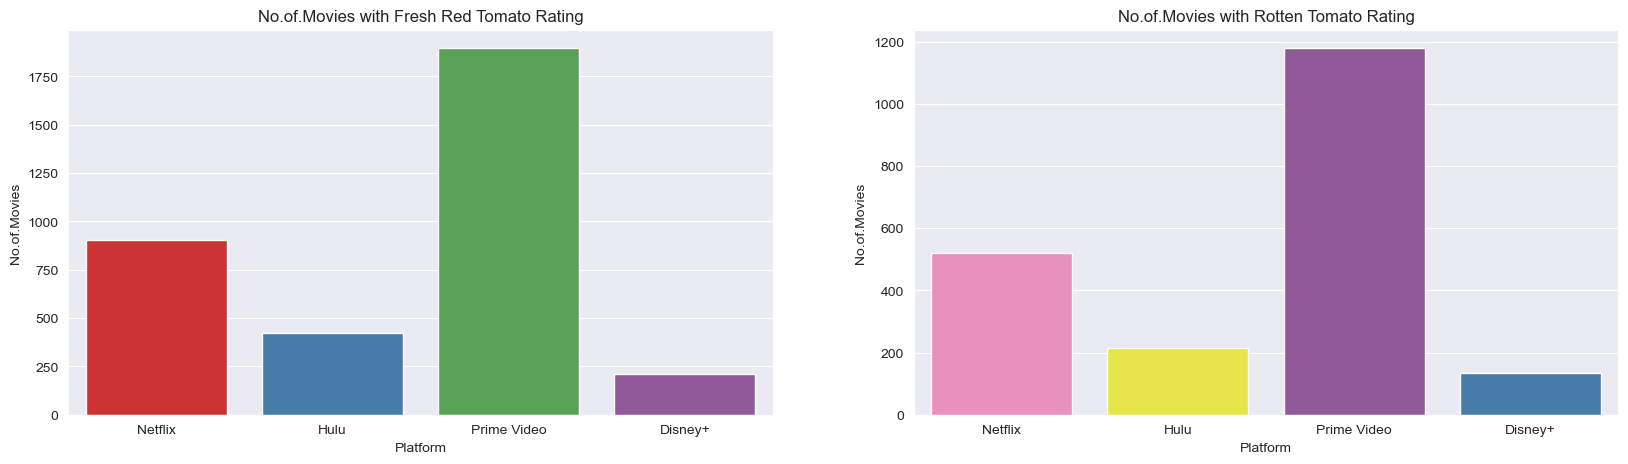

In [30]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.title("No.of.Movies with Fresh Red Tomato Rating")

sns.barplot(x='Platform', y='No.of.Movies', data=fresh_red_tomato, palette='Set1')


plt.subplot(122)
plt.title("No.of.Movies with Rotten Tomato Rating")

sns.barplot(x='Platform', y='No.of.Movies', data=rotten_tomato, palette='Set1_r')
plt.show()

### IMDB Ratings:

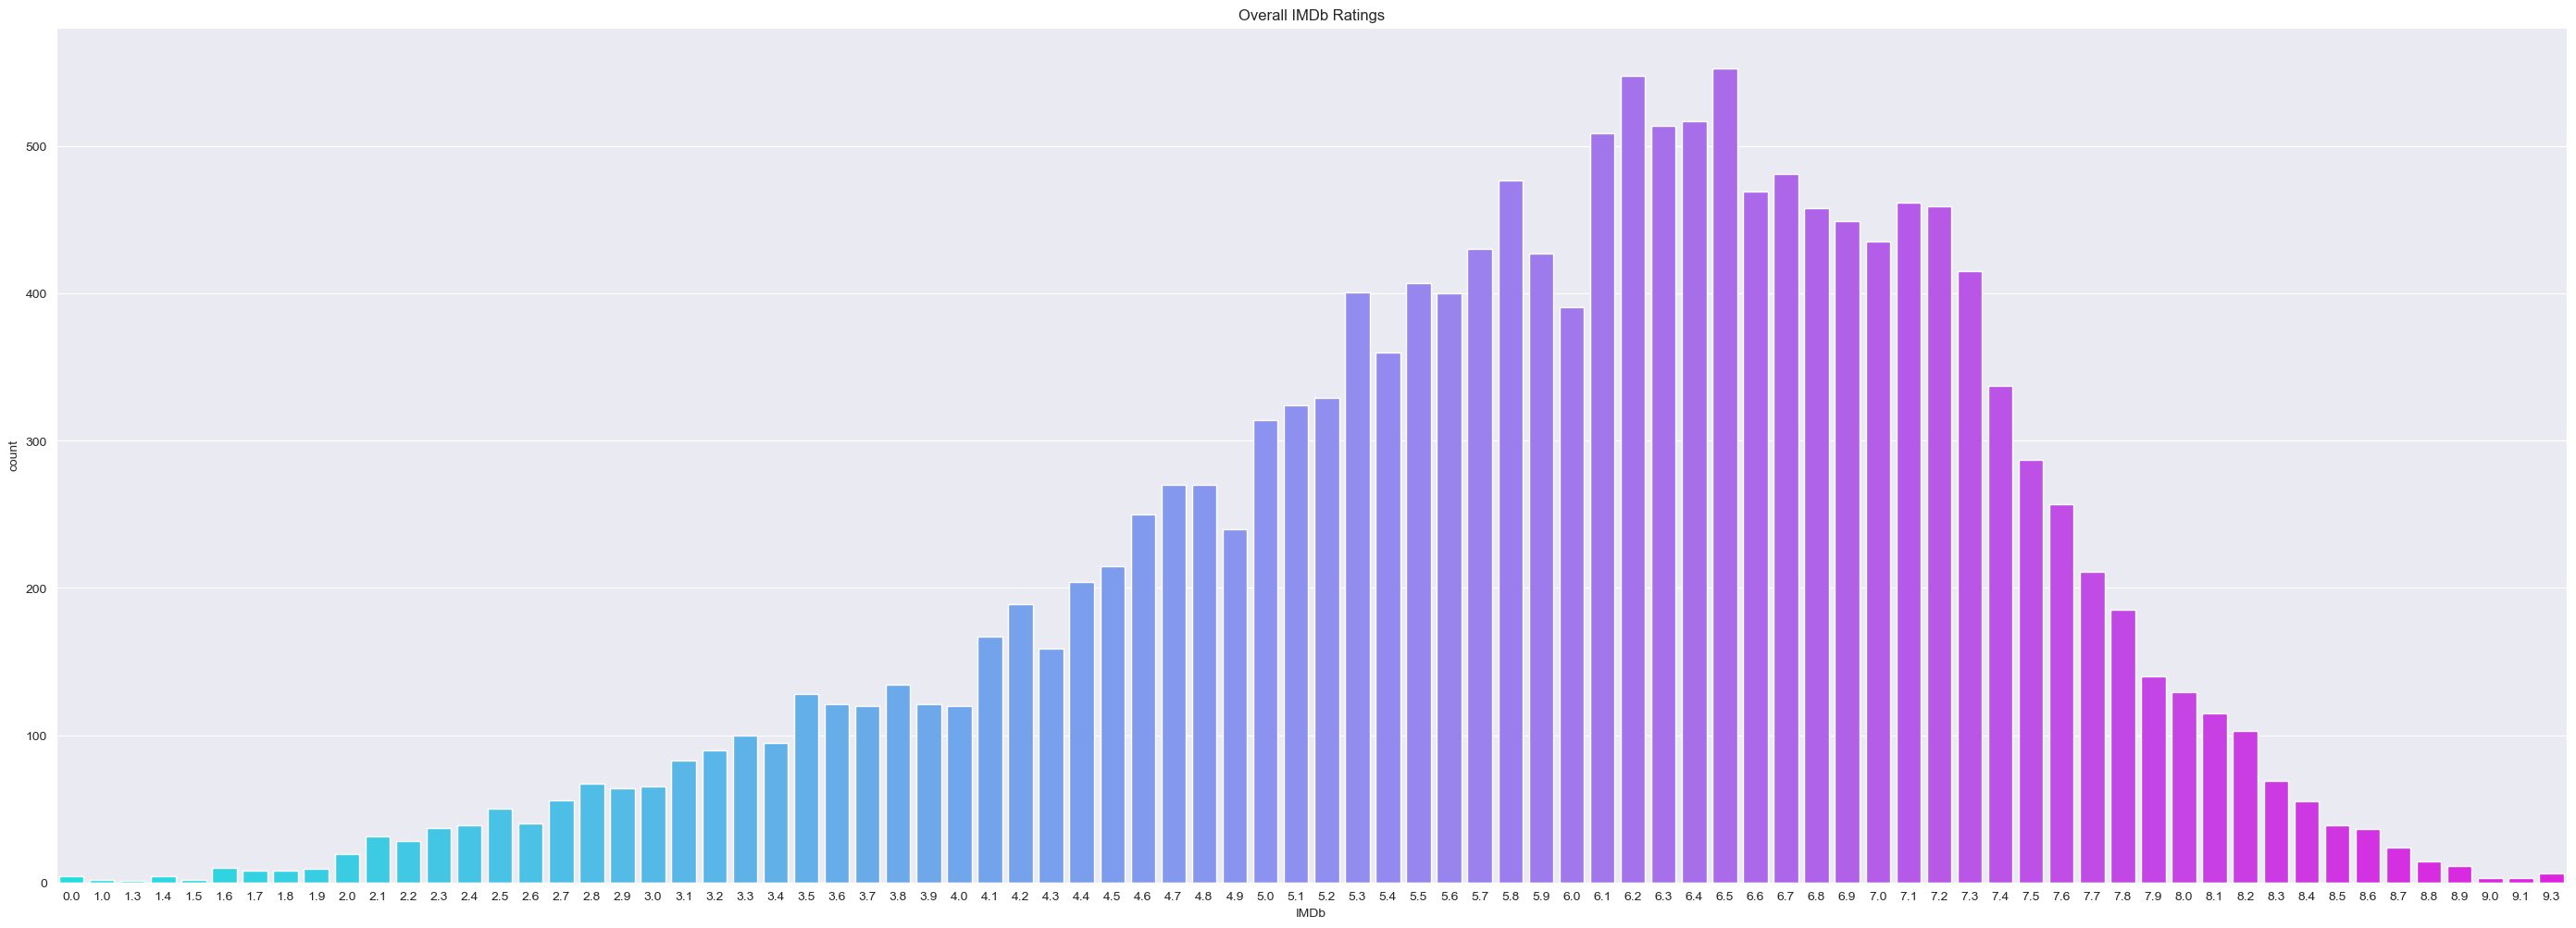

In [31]:
plt.figure(figsize=(35,12))
plt.title('Overall IMDb Ratings')
sns.countplot(x=df['IMDb'], palette='cool')
plt.show()

### Top movies having IMDb rating morethan 8.5 in each platform:

In [32]:
def top_movies_IMDb(platform,col,x,y):
    df1=df[(df[platform]==1) & (df['IMDb']>8.5)]
    top=df1[['Title','IMDb']]
    top.sort_values(by='IMDb', ascending=False, inplace=True)
    
    
    plt.figure(figsize=(x,y))
    plt.title('Top movies on '+platform+' having IMDb rating morethan 8.5:')
    sns.barplot(x='IMDb', y='Title', data=top, color=col)
    
    return (plt.show(),top)

### 1. Netflix:

C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\1794862792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top.sort_values(by='IMDb', ascending=False, inplace=True)


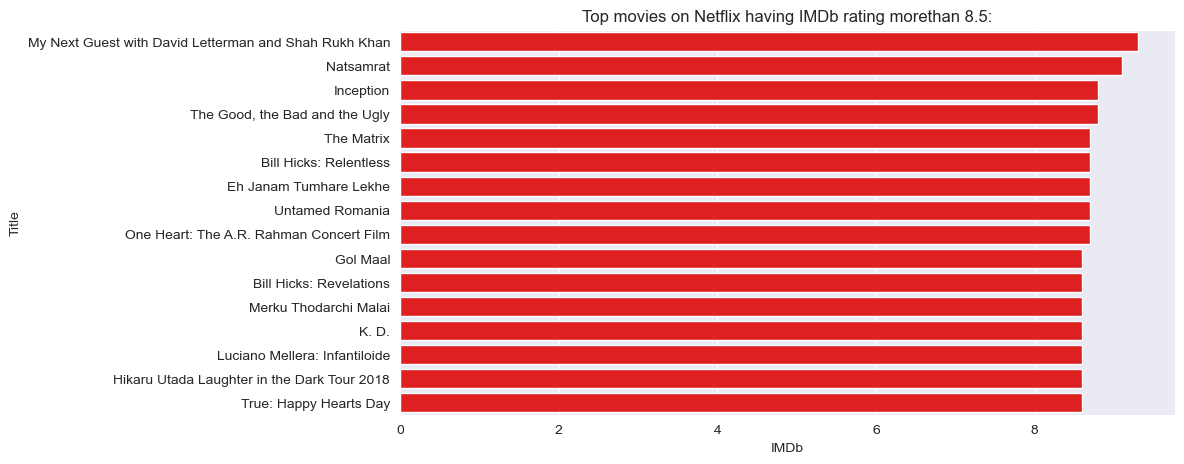

(None,
                                                   Title  IMDb
 1292  My Next Guest with David Letterman and Shah Ru...   9.3
 947                                           Natsamrat   9.1
 0                                             Inception   8.8
 4                        The Good, the Bad and the Ugly   8.8
 1                                            The Matrix   8.7
 1214                             Bill Hicks: Relentless   8.7
 1311                             Eh Janam Tumhare Lekhe   8.7
 1458                                    Untamed Romania   8.7
 1979            One Heart: The A.R. Rahman Concert Film   8.7
 845                                            Gol Maal   8.6
 1312                            Bill Hicks: Revelations   8.6
 1356                              Merku Thodarchi Malai   8.6
 1468                                              K. D.   8.6
 1538                      Luciano Mellera: Infantiloide   8.6
 2195        Hikaru Utada Laughter in the Dark T

In [33]:
top_movies_IMDb('Netflix','red',10,5)

### 2. Hulu:

C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\1794862792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top.sort_values(by='IMDb', ascending=False, inplace=True)


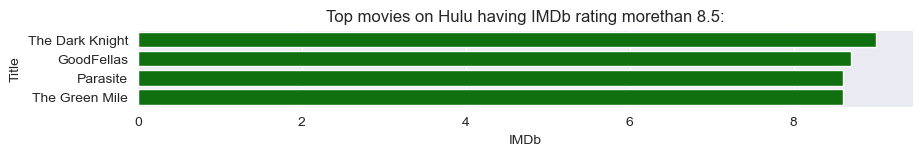

(None,
                 Title  IMDb
 3560  The Dark Knight   9.0
 3561       GoodFellas   8.7
 3562         Parasite   8.6
 3564   The Green Mile   8.6)

In [34]:
top_movies_IMDb('Hulu','green',10,1)

### 3. Prime Video:

C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\1794862792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top.sort_values(by='IMDb', ascending=False, inplace=True)


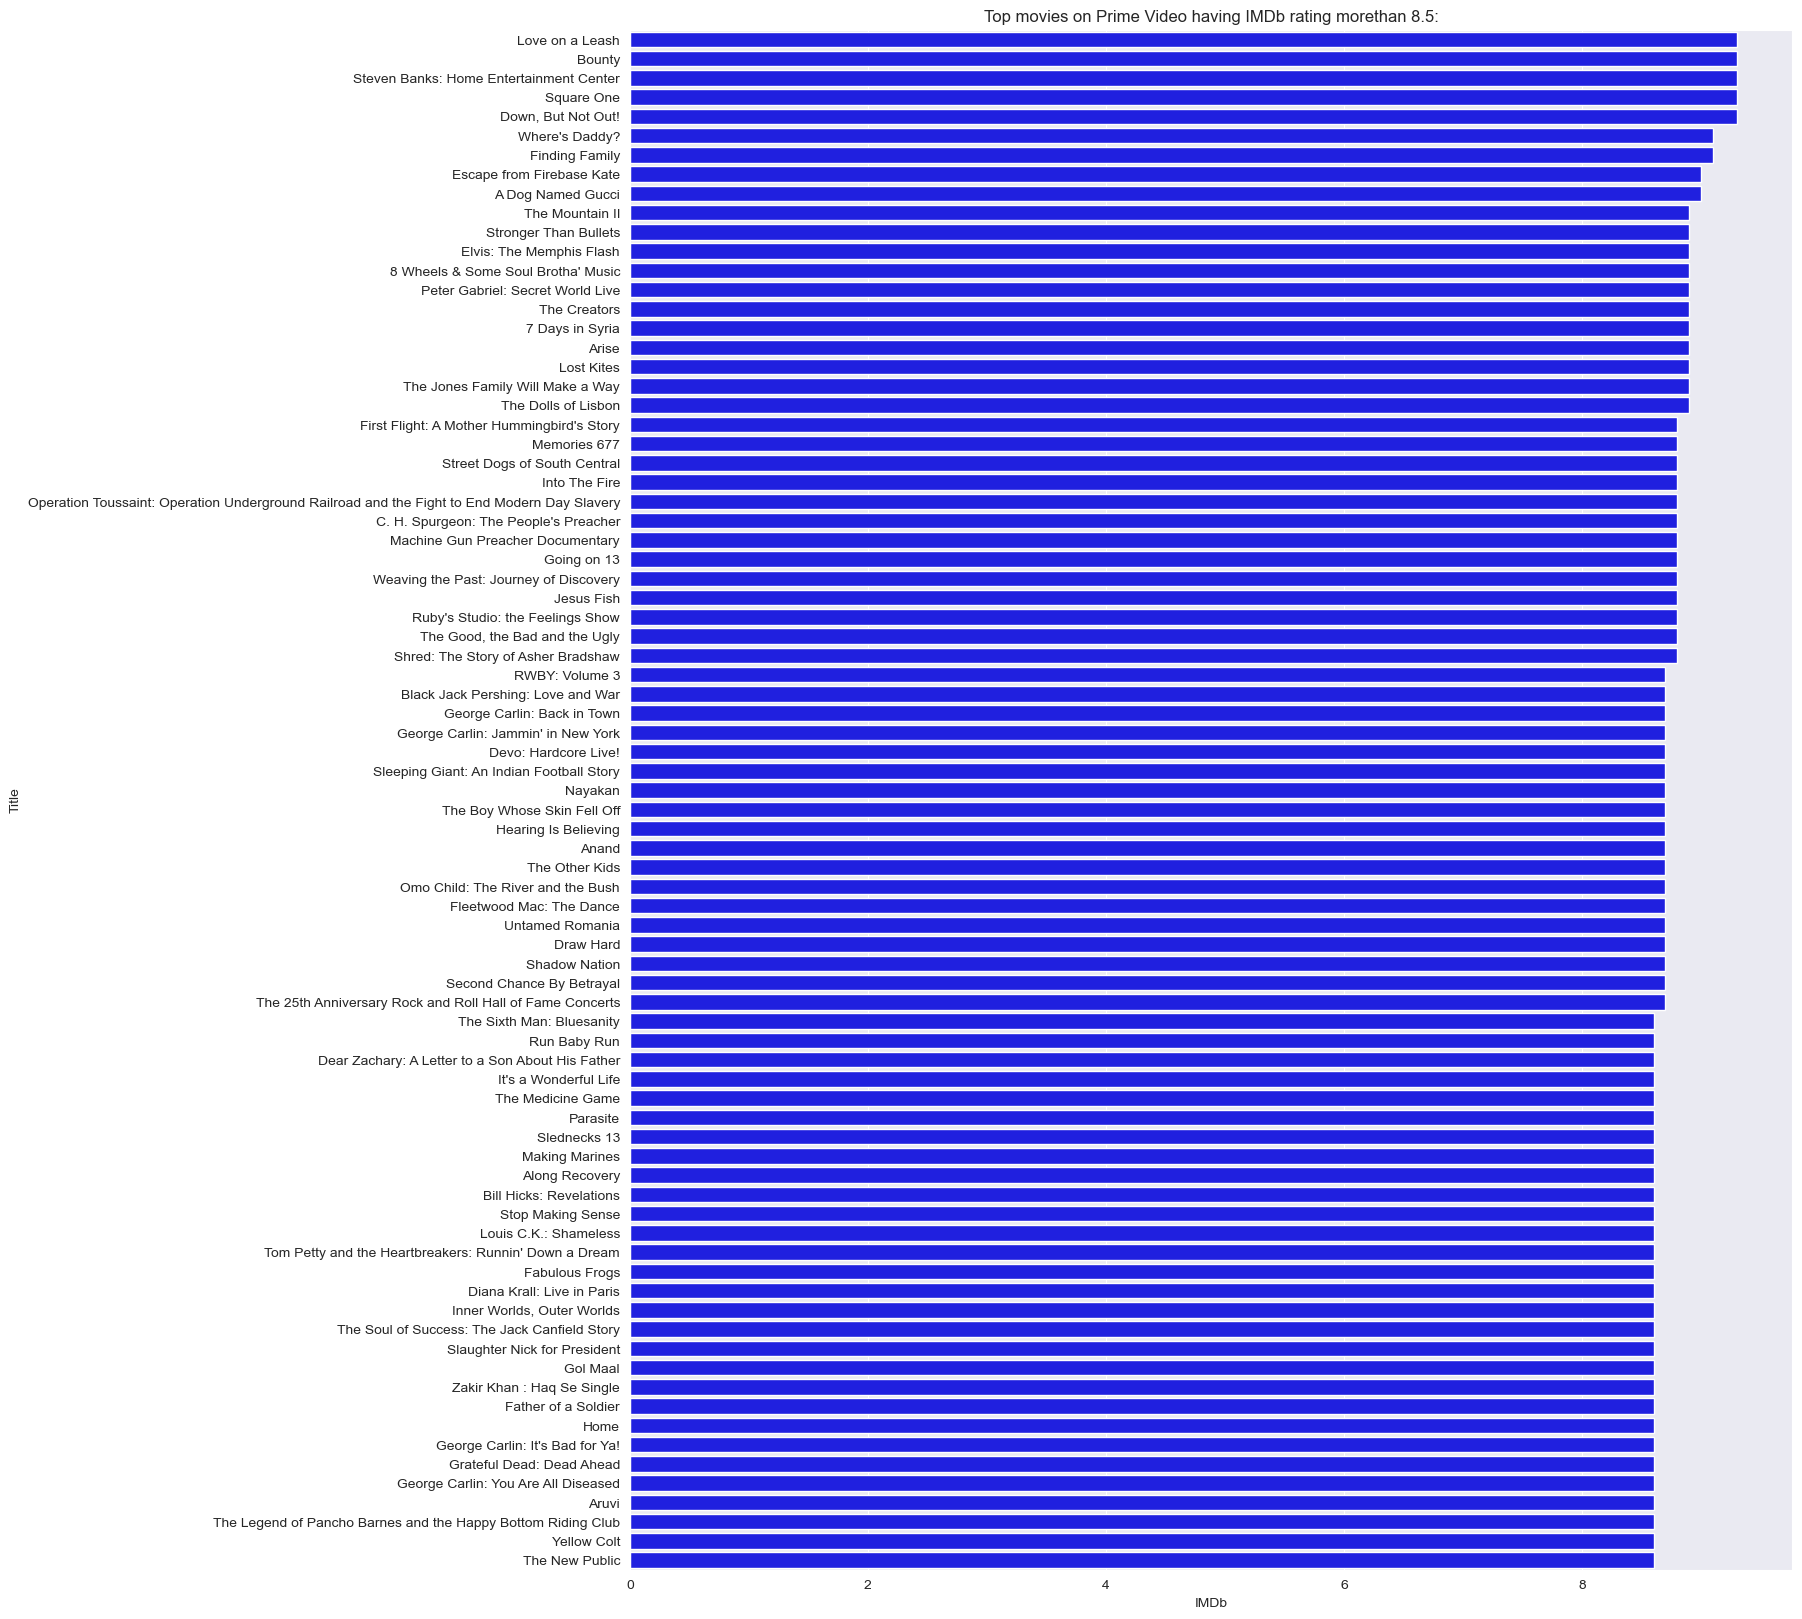

(None,
                                                   Title  IMDb
 5110                                    Love on a Leash   9.3
 7426                                             Bounty   9.3
 6837            Steven Banks: Home Entertainment Center   9.3
 6566                                         Square One   9.3
 7220                                 Down, But Not Out!   9.3
 ...                                                 ...   ...
 5730                George Carlin: You Are All Diseased   8.6
 5607                                              Aruvi   8.6
 9004  The Legend of Pancho Barnes and the Happy Bott...   8.6
 9098                                        Yellow Colt   8.6
 7619                                     The New Public   8.6
 
 [80 rows x 2 columns])

In [35]:
top_movies_IMDb('Prime Video','blue',15,20)

### 4. Disney+:

C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\1794862792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top.sort_values(by='IMDb', ascending=False, inplace=True)


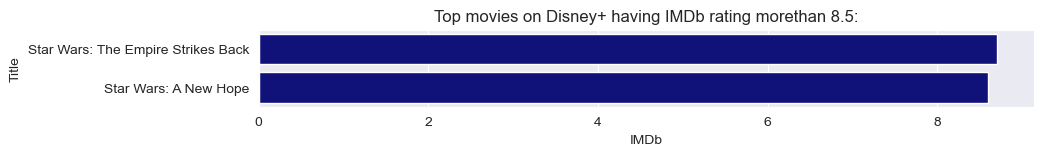

(None,
                                     Title  IMDb
 16213  Star Wars: The Empire Strikes Back   8.7
 16212               Star Wars: A New Hope   8.6)

In [36]:
top_movies_IMDb('Disney+','darkblue',10,1)

## 4. Runtime:

### Runtime Distribution over movies in all platforms:

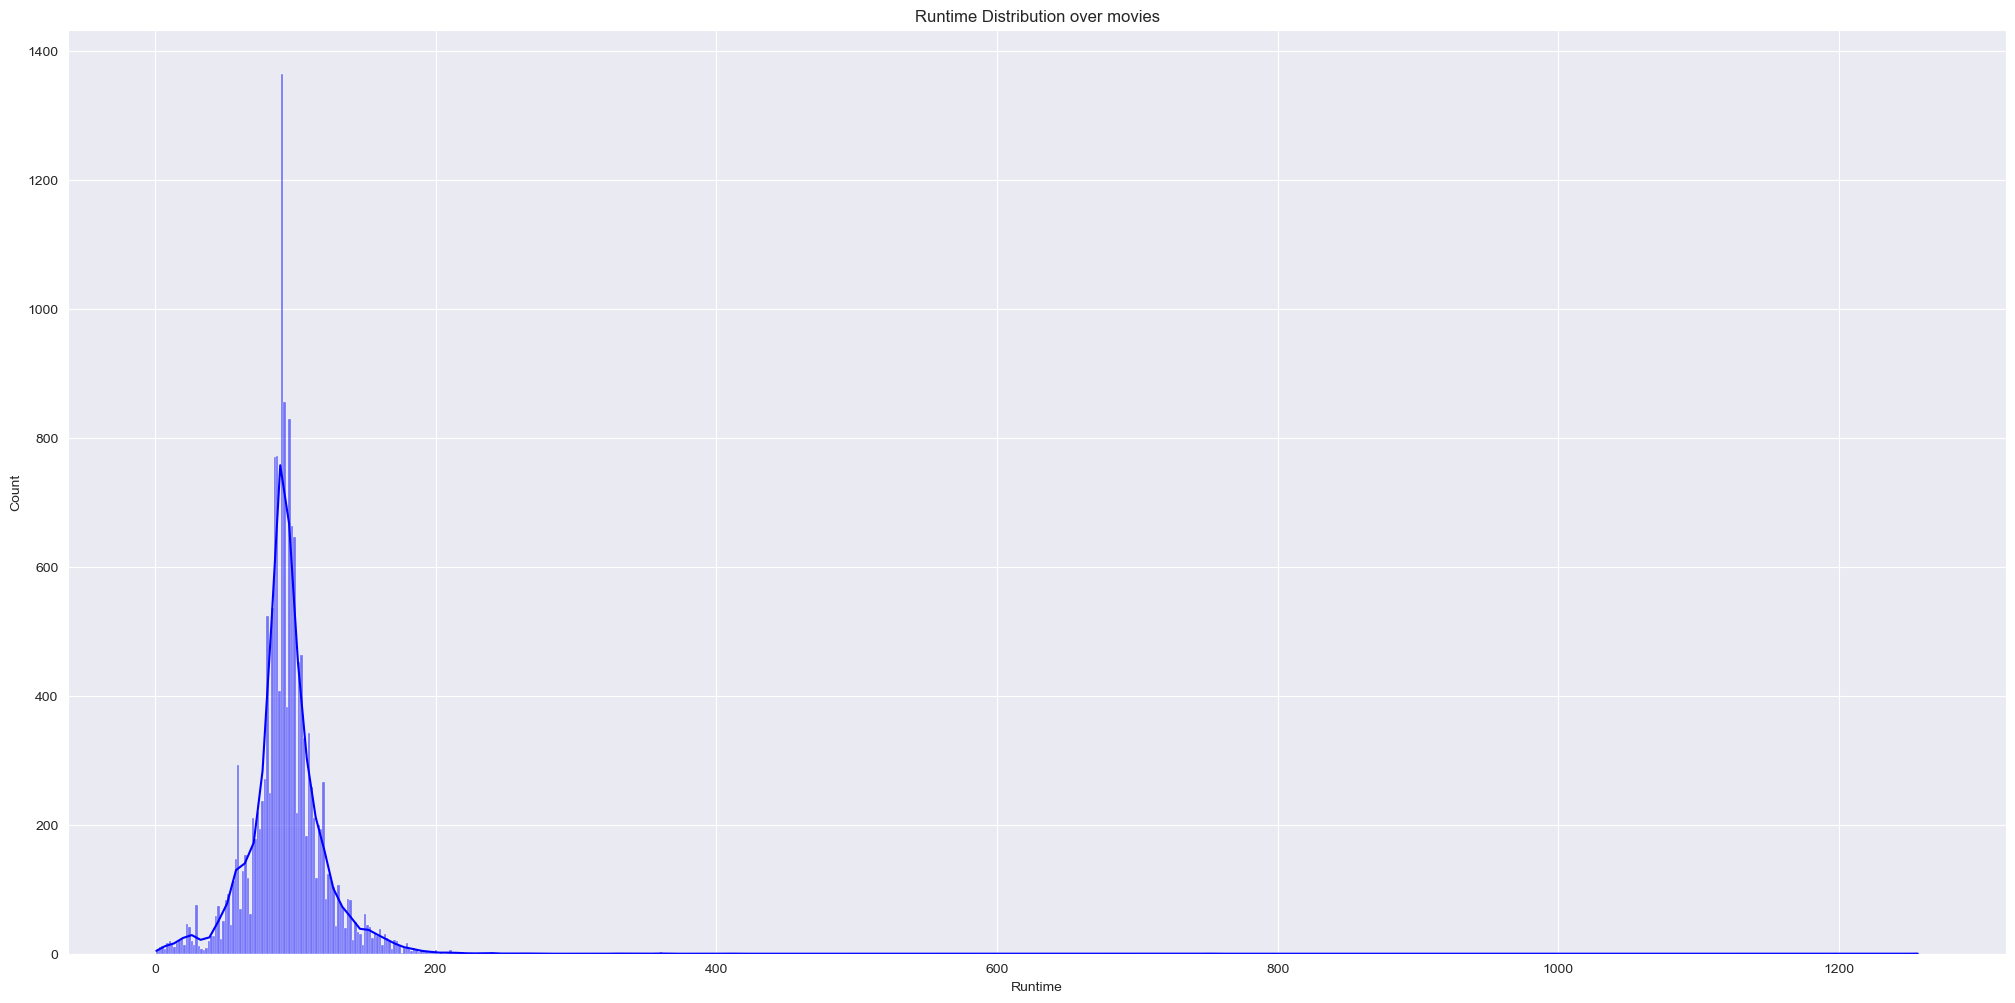

In [37]:
plt.figure(figsize=(25,12))
plt.title('Runtime Distribution over movies')
sns.histplot(df['Runtime'], color='blue', kde=True)
plt.show()

### Average runtime for each platform:

In [38]:
def avg_run(platform,x,y,col):  
    run=df[df[platform]==1][[platform,'Runtime']]

    plt.figure(figsize=(x,y))
    plt.title('Average runtime: '+platform)
    sns.histplot(run['Runtime'], kde=True, color=col)
    plt.show()

### 1. Netflix:

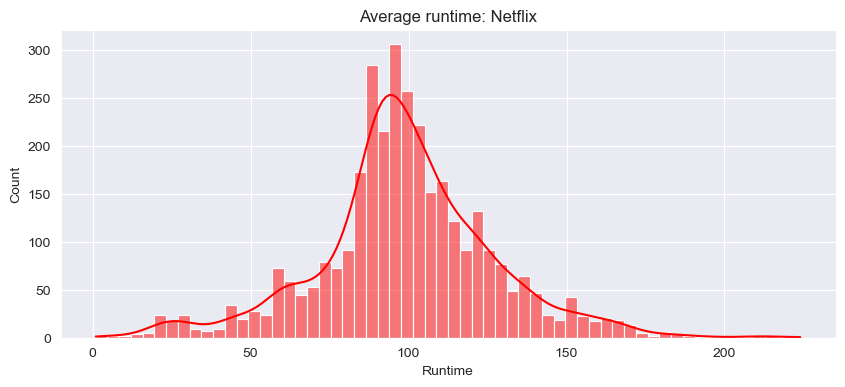

In [39]:
avg_run('Netflix',10,4,'red')

The average runtime in Netflix is around 100 min

### 2. Hulu:

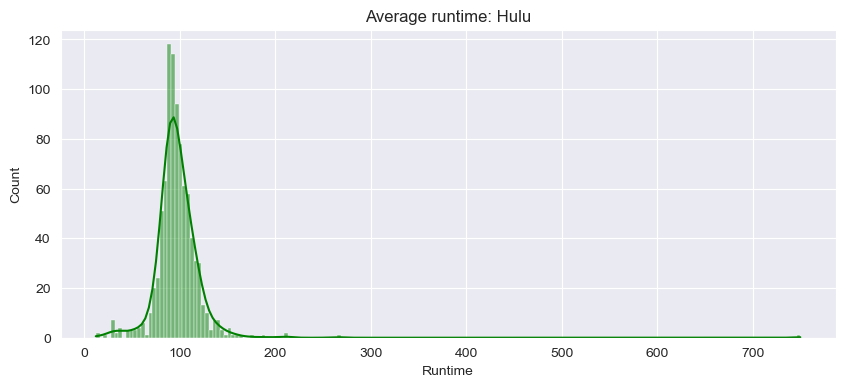

In [40]:
avg_run('Hulu',10,4,'green')

### 3. Prime Video:

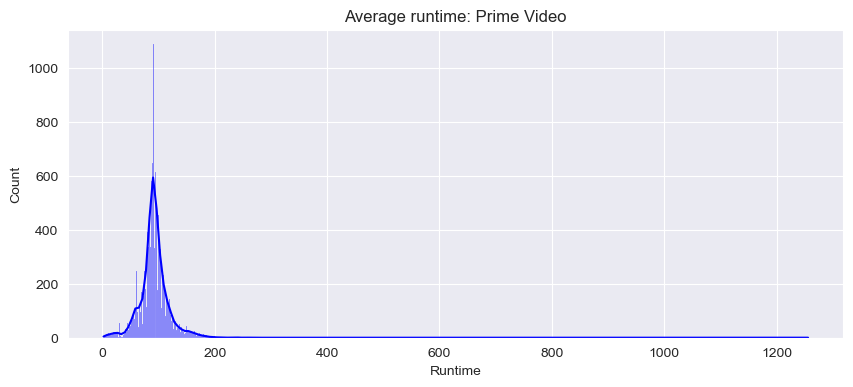

In [41]:
avg_run('Prime Video',10,4,'blue')

### 4. Disney+:

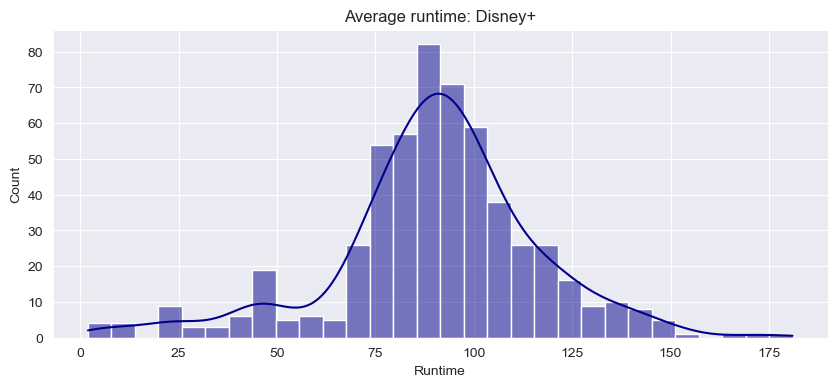

In [42]:
avg_run('Disney+',10,4,'darkblue')

The average runtime in Netflix is around 100 min

## 5. Directors:

### Top 20 Directors with most number of movies across all platforms:

In [43]:
df['Directors']=df['Directors'].astype(str)

In [44]:
directors_count=dict()

dir_in_data=list(df['Directors'])

for i in dir_in_data:
    curr= i.split(',')
    
    for j in curr:
        
        if j in directors_count.keys():
            directors_count[j]+=1
        else:
            directors_count[j]=1
        

In [45]:
dircount=pd.DataFrame(directors_count.items(), columns=['Directors','count'])
dircount.sort_values(by='count', ascending=False, inplace=True)
dircount.drop(56, axis=0, inplace=True)
dircount=dircount.head(20)
dircount

,Directors,count
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
1415,Jan Suter,21


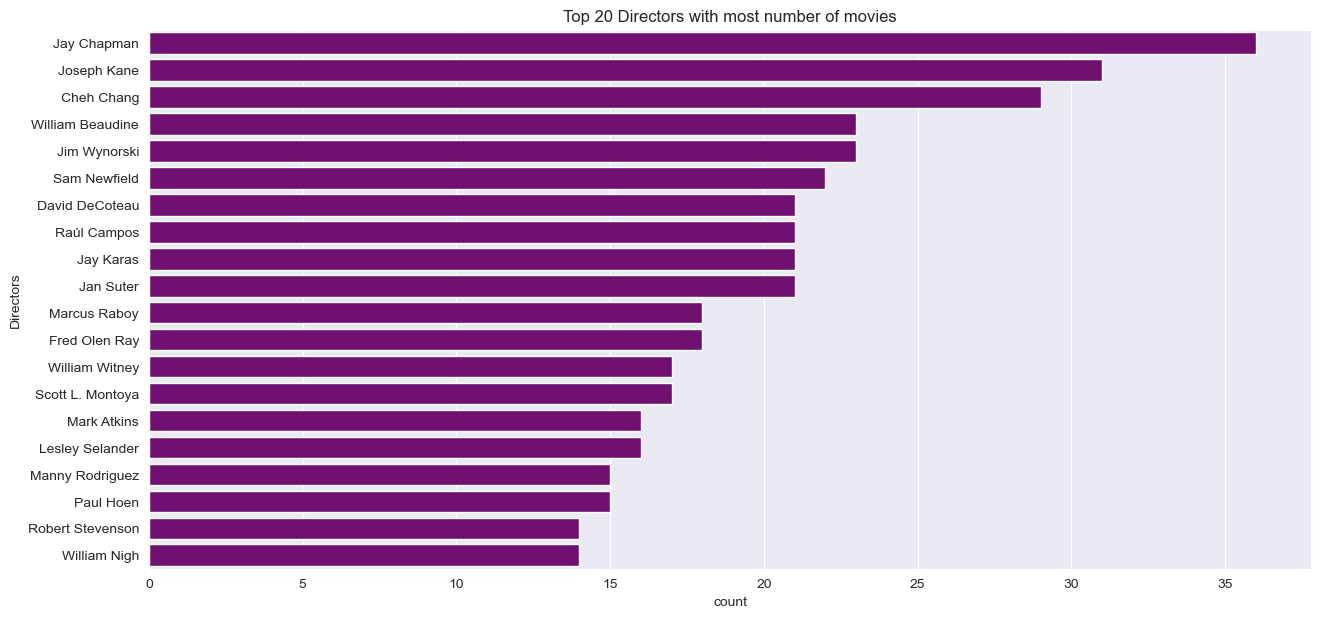

In [46]:
plt.figure(figsize=(15,7))
plt.title('Top 20 Directors with most number of movies')
sns.barplot(x='count', y='Directors', data=dircount, color='purple')
plt.show()

We can see from above that Jay Chapman has directed most of the movies.

In [47]:
# list of movies directed by Jay Chapman:
d1=df[df['Directors']=='Jay Chapman'][['Directors','Language','Runtime','Genres','IMDb']]
d1

,Directors,Language,Runtime,Genres,IMDb
1014,Jay Chapman,English,60.0,"Documentary,Comedy",7.6
1234,Jay Chapman,English,75.0,Comedy,6.7
1417,Jay Chapman,English,74.0,"Documentary,Comedy",7.8
2211,Jay Chapman,English,60.0,Comedy,6.7
2331,Jay Chapman,English,66.0,Comedy,6.6
2393,Jay Chapman,English,55.0,Comedy,7.1
2447,Jay Chapman,English,50.0,Comedy,5.5
2523,Jay Chapman,English,58.0,Comedy,6.5
2636,Jay Chapman,English,60.0,Comedy,6.7
2721,Jay Chapman,nan,61.0,Comedy,6.8


In [48]:
print("Jay Chapman:")

print('1. Jay Chapman directed all movies in English')
print('2. The average runtime of all movies directed by Jay Chapman:',round(d1['Runtime'].mean(),2),'min')
print('3. Mostly Jay Chapman directed Comedy Genre movies')
print('4. His movies got an average IMDb rating of:',round(d1['IMDb'].mean(),2))

Jay Chapman:
1. Jay Chapman directed all movies in English
2. The average runtime of all movies directed by Jay Chapman: 60.22 min
3. Mostly Jay Chapman directed Comedy Genre movies
4. His movies got an average IMDb rating of: 6.47


### Top 10 Directors with most number of movies in each platform:

C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\38901643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df[column]=netflix_df[column].astype(str)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\1775973053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df[column]=hulu_df[column].astype(str)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\3765960614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

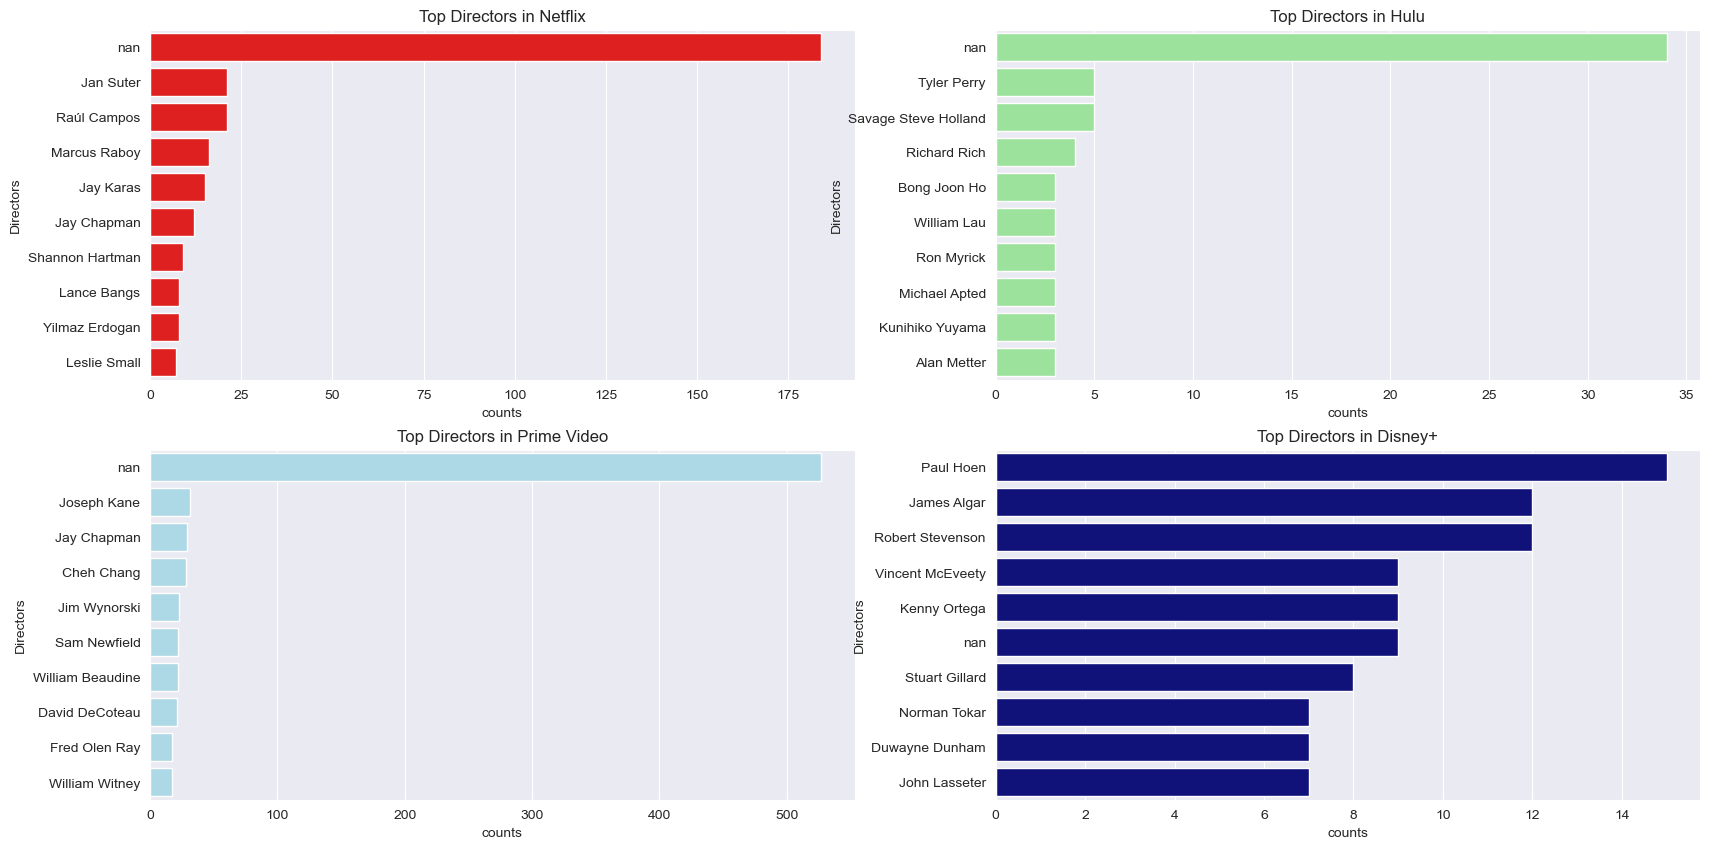

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(221)
cnt_netflix('Directors')

plt.subplot(222)
cnt_hulu('Directors')

plt.subplot(223)
cnt_prime('Directors')

plt.subplot(224)
cnt_disney('Directors')

plt.show()

Don't consider nan

## 6. Genres:

### Top Genres across all platforms:

In [50]:
df['Genres']=df['Genres'].astype(str)

In [51]:
gen_dic=dict()
gen_list=list(df['Genres'])

for i in gen_list:
    x=i.split(',')
    
    for j in x:
        
        if j in gen_dic.keys():
            gen_dic[j]+=1
        else:
            gen_dic[j]=1
            

In [52]:
gencount=pd.DataFrame(gen_dic.items(), columns=['Genre','count'])
gencount.sort_values(by='count', ascending=False, inplace=True)
gencount

,Genre,count
9,Drama,7227
4,Comedy,4637
3,Thriller,3354
0,Action,2683
19,Documentary,2546
14,Romance,2359
17,Horror,2201
12,Crime,1833
1,Adventure,1778
7,Family,1514


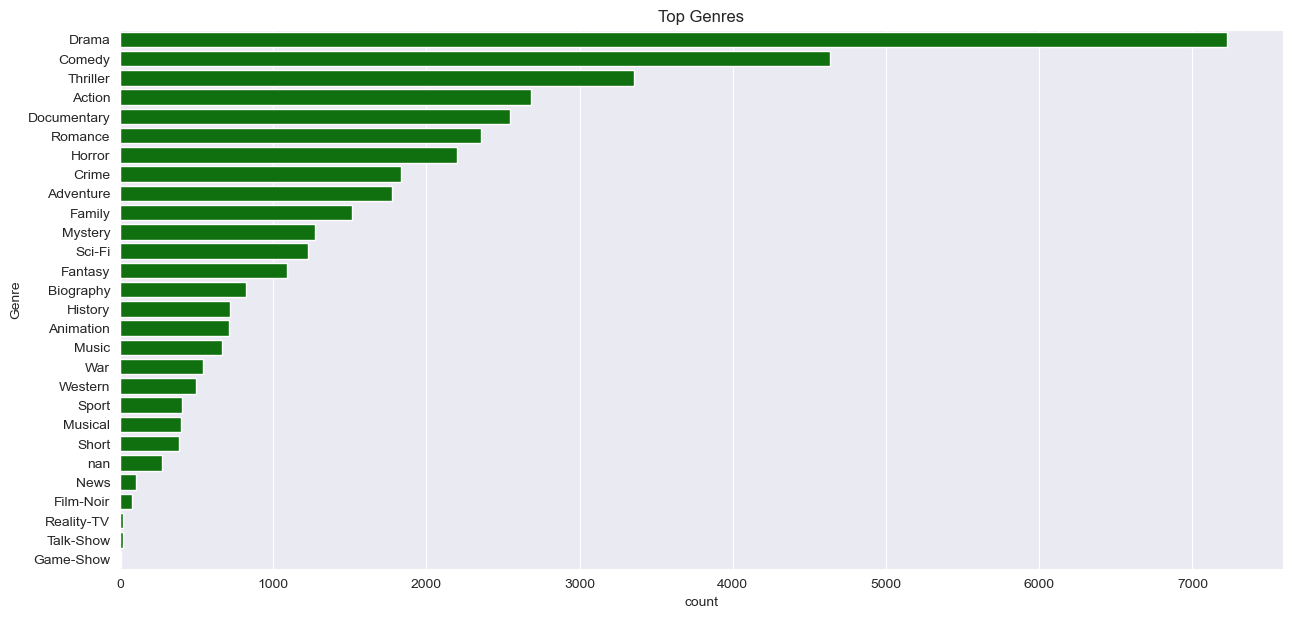

In [53]:
plt.figure(figsize=(15,7))
plt.title('Top Genres')
sns.barplot(x='count', y='Genre', data=gencount, color='green')
plt.show()

Most of the movies are Drama hence it has the highest count.

### Top 10 Genres in each platform:

C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\38901643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df[column]=netflix_df[column].astype(str)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\1775973053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df[column]=hulu_df[column].astype(str)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\3765960614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

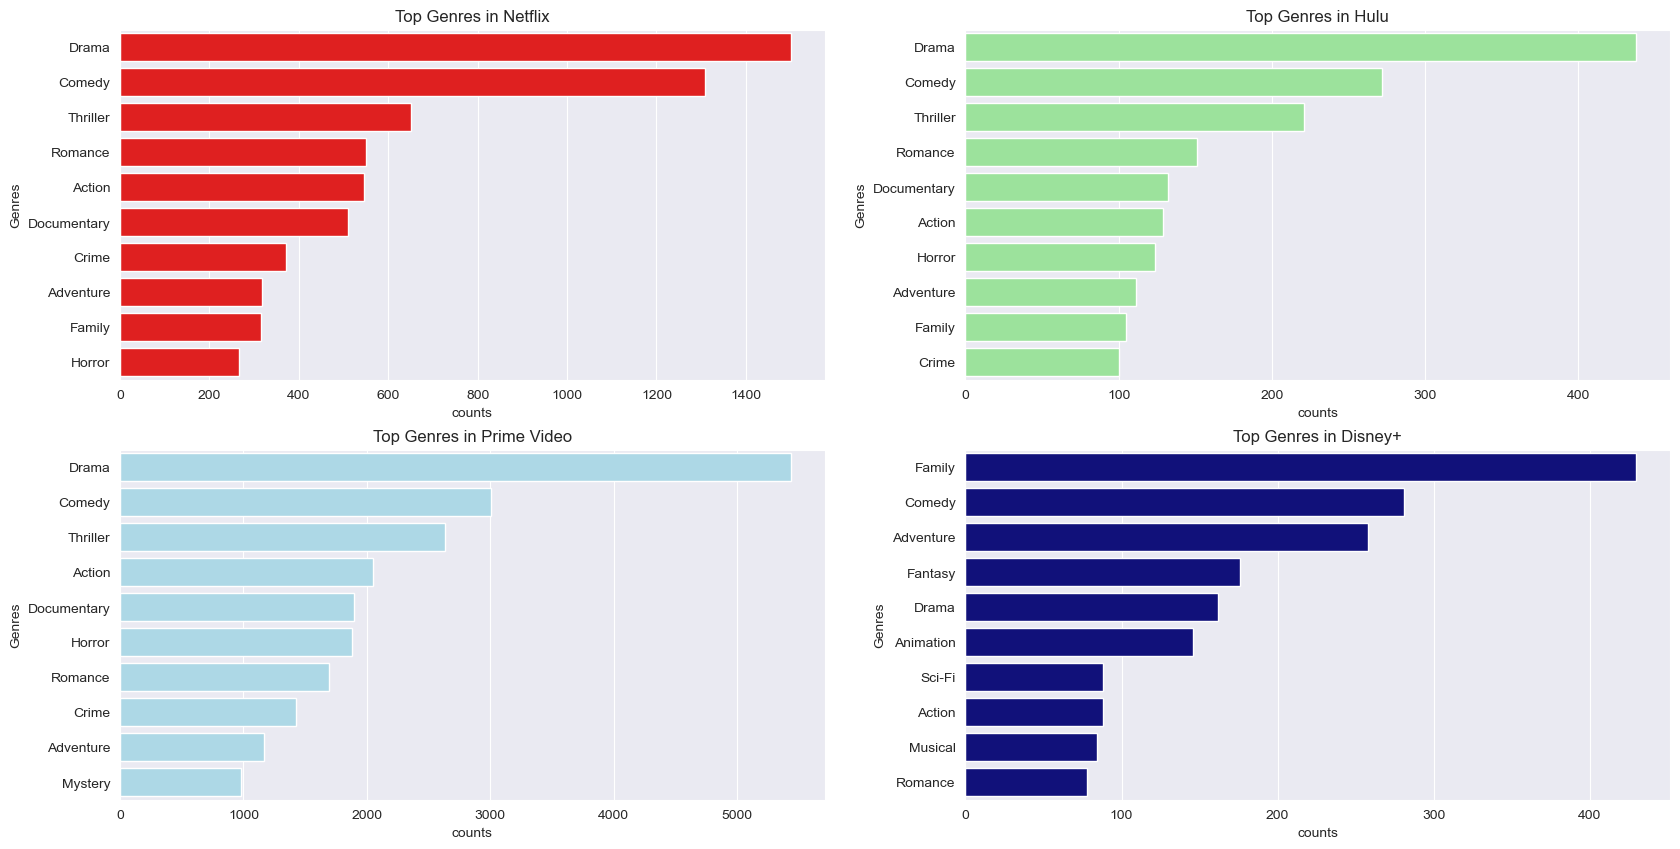

In [54]:
plt.figure(figsize=(20,10))

plt.subplot(221)
cnt_netflix('Genres')

plt.subplot(222)
cnt_hulu('Genres')

plt.subplot(223)
cnt_prime('Genres')

plt.subplot(224)
cnt_disney('Genres')

plt.show()

## 7. Countries:

### Top 20 countries with most number of movies across all platforms:

In [55]:
df['Country']=df['Country'].astype(str)

In [56]:
cou_dic=dict()
cou_list=list(df['Country'])

for i in cou_list:
    x=i.split(',')
    
    for j in x:
        if j in cou_dic.keys():
            cou_dic[j]+=1
        else:
            cou_dic[j]=1
            

In [57]:
countrycount=pd.DataFrame(cou_dic.items(), columns=['Country','counts'])
countrycount.sort_values(by='counts', ascending=False, inplace=True)
countrycount.drop(58, axis=0, inplace=True)
countrycount=countrycount.head(20)
countrycount

,Country,counts
0,United States,10486
1,United Kingdom,1713
8,India,1157
11,Canada,1117
5,France,741
7,Germany,498
49,nan,435
2,Italy,417
3,Spain,329
12,Australia,321


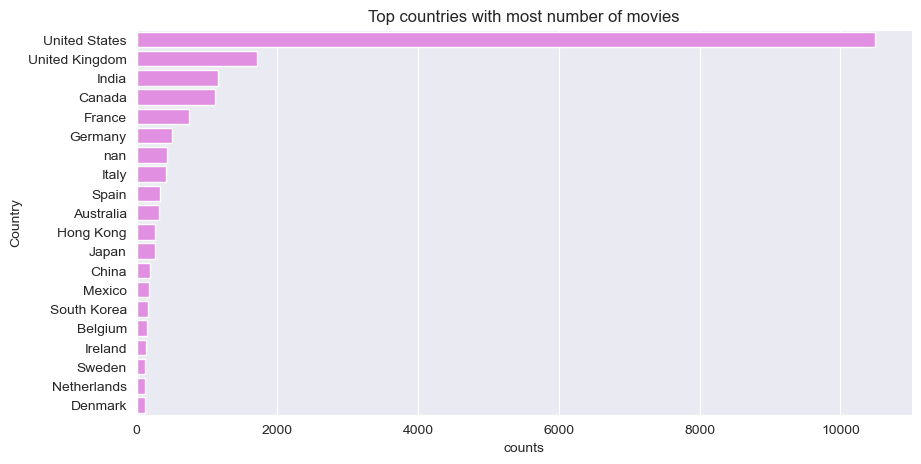

In [58]:
plt.figure(figsize=(10,5))
plt.title('Top countries with most number of movies')
sns.barplot(x='counts', y='Country', data=countrycount, color='violet')
plt.show()

### Top 10 countries with most number of movies in each platform:

C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\38901643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df[column]=netflix_df[column].astype(str)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\1775973053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df[column]=hulu_df[column].astype(str)
C:\Users\yuvan\AppData\Local\Temp\ipykernel_14360\3765960614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

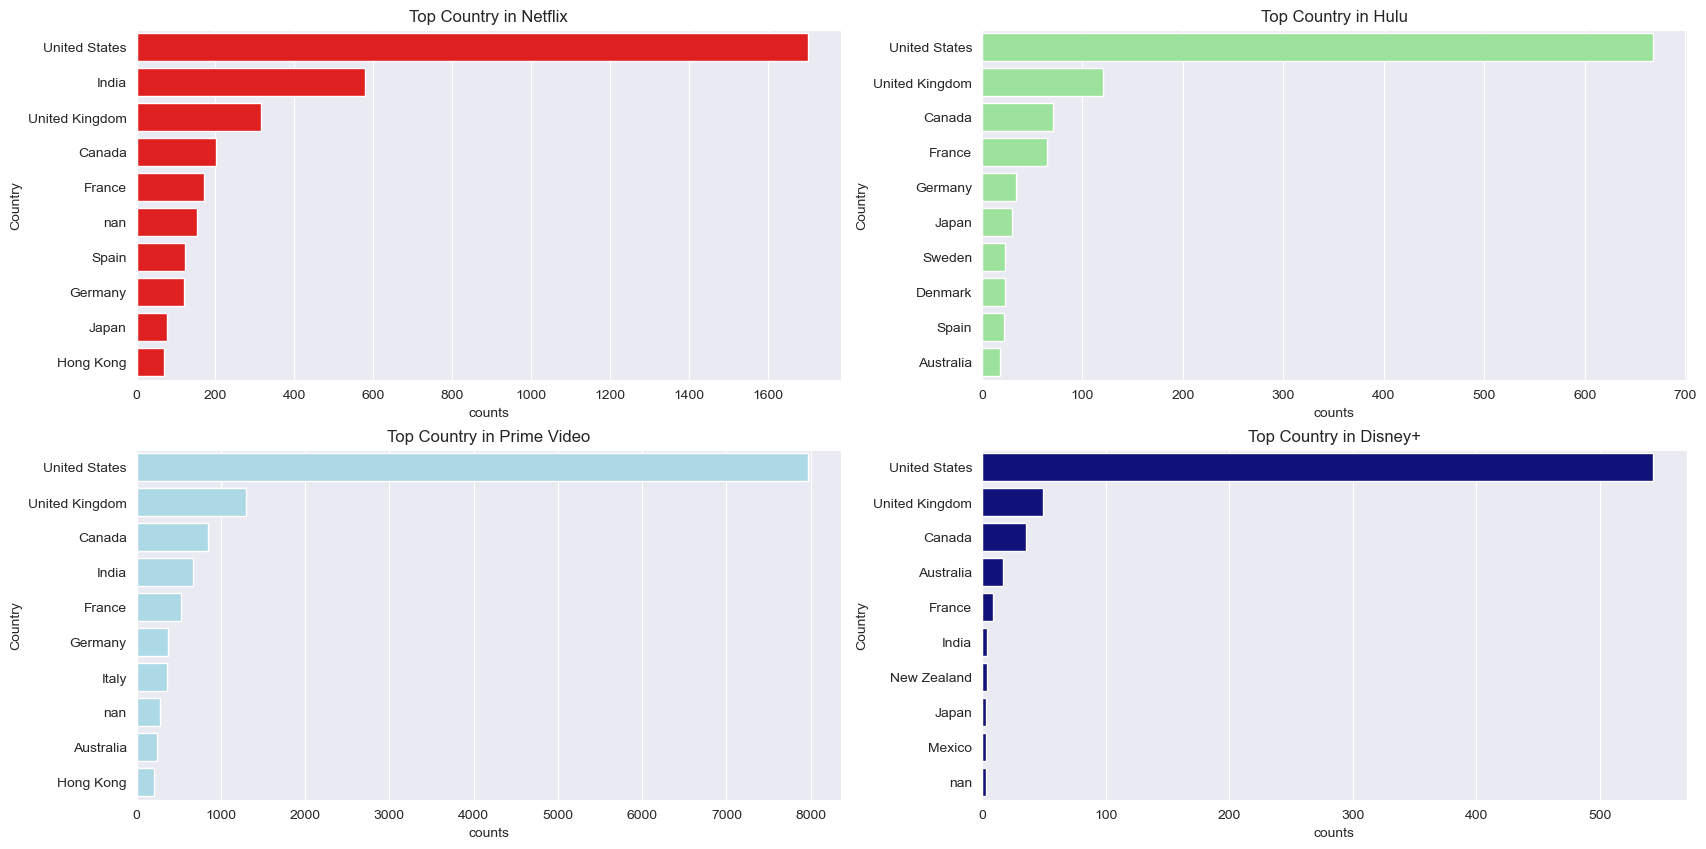

In [59]:
plt.figure(figsize=(20,10))

plt.subplot(221)
cnt_netflix('Country')

plt.subplot(222)
cnt_hulu('Country')

plt.subplot(223)
cnt_prime('Country')

plt.subplot(224)
cnt_disney('Country')

plt.show()

## 8. Year:

### Year with maximum number of movies:

In [60]:
df['Year'].value_counts().head(20)

2017    1401
2018    1285
2016    1206
2015    1065
2014     986
2013     964
2012     843
2019     689
2011     645
2009     548
2010     533
2008     442
2007     375
2006     338
2005     285
2004     217
2003     214
2002     193
2000     172
2001     156
Name: Year, dtype: int64

In [61]:
df['Year'].value_counts().tail(20)

1931    20
1930    12
1922     7
1929     6
1925     6
1920     5
1915     4
1918     3
1921     3
1923     3
1926     3
1928     3
1913     2
1927     2
1919     2
1924     1
1902     1
1912     1
1917     1
1916     1
Name: Year, dtype: int64

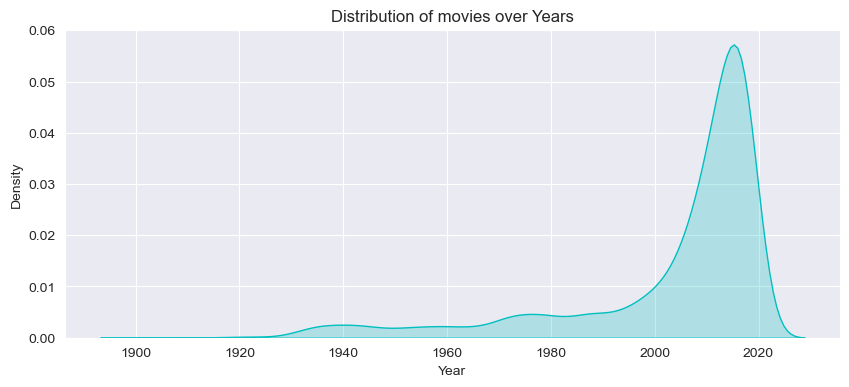

In [62]:
plt.figure(figsize=(10,4))
plt.title('Distribution of movies over Years')
sns.kdeplot(df['Year'], color='c', fill=True)
plt.show()

Maximum number of movies were produced after 2000

### Movies the were created before 2000:

In [63]:
bef2000=df[df['Year']<=2000][['Title','Year']]
bef2000.sort_values(by='Year', ascending=False, inplace=True)
bef2000

,Title,Year
8615,MVP: Most Valuable Primate,2000
14269,Slow Burn,2000
1723,Phir Bhi Dil Hai Hindustani,2000
8814,BookWars,2000
11914,Up Against Amanda,2000
...,...,...
11524,Her Painted Hero,1915
9917,Fatty Joins the Force,1913
10170,The Speed Kings,1913
8795,From the Manger to the Cross,1912


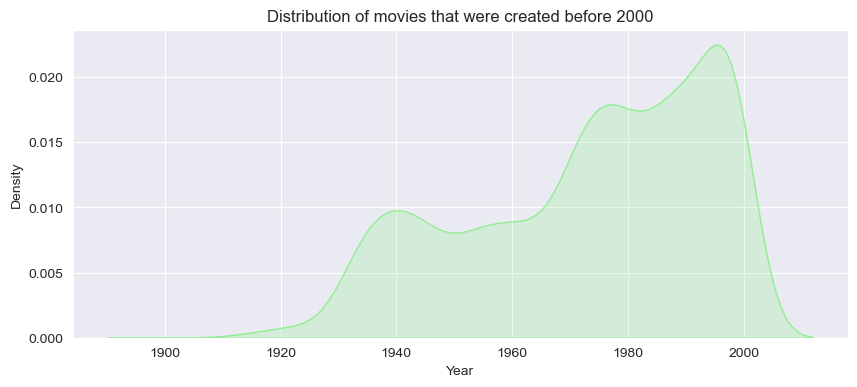

In [64]:
plt.figure(figsize=(10,4))
plt.title('Distribution of movies that were created before 2000')
sns.kdeplot(bef2000['Year'], color='lightgreen', fill=True)
plt.show()

### Distribution movies the were created after 2000:

In [65]:
aft2000=df[df['Year']>=2000][['Title','Year']]
aft2000.sort_values(by='Year', ascending=False, inplace=True)
aft2000

,Title,Year
1630,Vir Das: For India,2020
1819,Varane Avashyamund,2020
718,Go!,2020
465,Tigertail,2020
464,The Half of It,2020
...,...,...
5899,Bruce Lee: A Warrior's Journey,2000
13690,The Ghost of Spoon River,2000
3620,Chicken Run,2000
11985,24 Hours in London,2000


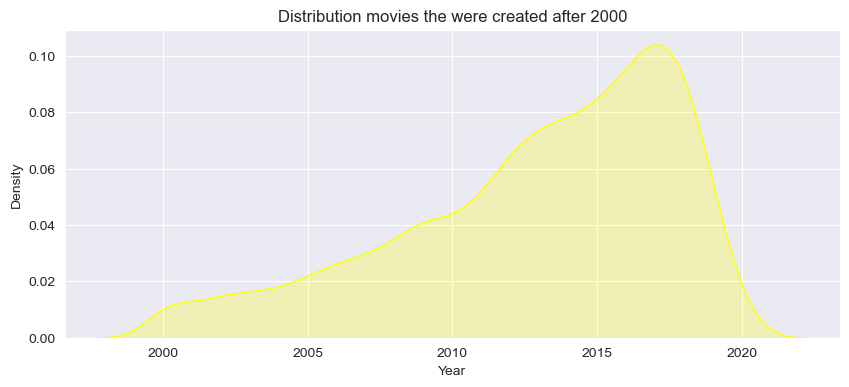

In [66]:
plt.figure(figsize=(10,4))
plt.title('Distribution movies the were created after 2000')
sns.kdeplot(aft2000['Year'], color='yellow', fill=True)
plt.show()

## Movies Present on more than one platform:

### Netflix and Hulu:

In [67]:
netflix_hulu = df[(df['Netflix']==1)&(df['Hulu']==1)&(df['Prime Video']==0)&(df['Disney+']==0)][['Title','Netflix','Hulu','Prime Video','Disney+']]
netflix_hulu

,Title,Netflix,Hulu,Prime Video,Disney+
67,Blackfish,1,1,0,0
97,Jiro Dreams of Sushi,1,1,0,0
146,The Patriot,1,1,0,0
214,Hitch,1,1,0,0
285,Hey Arnold! The Jungle Movie,1,1,0,0
894,The Oath,1,1,0,0
897,Little Monsters,1,1,0,0
939,Lost in London,1,1,0,0
1035,Gemini,1,1,0,0
1301,Major League II,1,1,0,0


### Netflix and Prime:

In [68]:
netflix_prime = df[(df['Netflix']==1)&(df['Hulu']==0)&(df['Prime Video']==1)&(df['Disney+']==0)][['Title','Netflix','Hulu','Prime Video','Disney+']]
netflix_prime

,Title,Netflix,Hulu,Prime Video,Disney+
4,"The Good, the Bad and the Ugly",1,0,1,0
6,The Pianist,1,0,1,0
11,3 Idiots,1,0,1,0
15,Once Upon a Time in the West,1,0,1,0
31,Drive,1,0,1,0
...,...,...,...,...,...
3439,Hisss,1,0,1,0
3440,Coffee with D,1,0,1,0
3445,Cappuccino,1,0,1,0
3512,Paradise Lost,1,0,1,0


### Netflix and Disney:

In [69]:
netflix_disney = df[(df['Netflix']==1)&(df['Hulu']==0)&(df['Prime Video']==0)&(df['Disney+']==1)][['Title','Netflix','Hulu','Prime Video','Disney+']]
netflix_disney

,Title,Netflix,Hulu,Prime Video,Disney+
95,Saving Mr. Banks,1,0,0,1
122,Bolt,1,0,0,1
125,The Princess and the Frog,1,0,0,1
150,Miracle,1,0,0,1
482,White Fang,1,0,0,1
724,Chicken Little,1,0,0,1
1647,Diana: In Her Own Words,1,0,0,1
1761,The Little Mermaid,1,0,0,1


### Hulu and Prime:

In [70]:
hulu_prime = df[(df['Netflix']==0)&(df['Hulu']==1)&(df['Prime Video']==1)&(df['Disney+']==0)][['Title','Netflix','Hulu','Prime Video','Disney+']]
hulu_prime

,Title,Netflix,Hulu,Prime Video,Disney+
3562,Parasite,0,1,1,0
3568,Zombieland,0,1,1,0
3569,A Quiet Place,0,1,1,0
3572,True Grit,0,1,1,0
3585,Up in the Air,0,1,1,0
...,...,...,...,...,...
4414,The Lonely Man,0,1,1,0
4426,The Clintons: An American Odyssey,0,1,1,0
4427,Boomtown,0,1,1,0
4429,Night of the Living Dead: Resurrection,0,1,1,0


### Hulu and Disney:

In [71]:
hulu_disney = df[(df['Netflix']==0)&(df['Hulu']==1)&(df['Prime Video']==0)&(df['Disney+']==1)][['Title','Netflix','Hulu','Prime Video','Disney+']]
hulu_disney

,Title,Netflix,Hulu,Prime Video,Disney+
3580,Free Solo,0,1,0,1
3679,Jane,0,1,0,1
3774,The Hunchback of Notre Dame,0,1,0,1
3854,Teen Spirit,0,1,0,1


### Prime and Disney:

In [72]:
prime_disney = df[(df['Netflix']==0)&(df['Hulu']==0)&(df['Prime Video']==1)&(df['Disney+']==1)][['Title','Netflix','Hulu','Prime Video','Disney+']]
prime_disney

,Title,Netflix,Hulu,Prime Video,Disney+
4438,The Avengers,0,0,1,1
4454,Thor,0,0,1,1
4455,Captain America: The First Avenger,0,0,1,1
4462,Iron Man 2,0,0,1,1
5164,Robin Hood,0,0,1,1
5398,The Three Musketeers,0,0,1,1
5401,Empire of Dreams: The Story of the Star Wars T...,0,0,1,1
6492,Cinderella,0,0,1,1
6855,Starstruck,0,0,1,1
6960,Elephant,0,0,1,1


### Netflix, Hulu and Prime:

In [73]:
netflix_ullu_prime = df[(df['Netflix']==1)&(df['Hulu']==1)&(df['Prime Video']==1)][['Title','Netflix','Hulu','Prime Video','Disney+']]
netflix_ullu_prime

,Title,Netflix,Hulu,Prime Video,Disney+
148,The Square,1,1,1,0
340,The Interview,1,1,1,0
497,Blame!,1,1,1,0
610,Evolution,1,1,1,0
1133,No Game No Life: Zero,1,1,1,0
2017,Mother,1,1,1,0


### Hulu, Prime and Disney:

In [74]:
hulu_prime_disney = df[(df['Hulu']==1)&(df['Prime Video']==1)&(df['Disney+']==1)][['Title','Netflix','Hulu','Prime Video','Disney+']]
hulu_prime_disney

,Title,Netflix,Hulu,Prime Video,Disney+
3960,The Kid,0,1,1,1
4313,Inside Out,0,1,1,1


### Prime, Disney and Netflix:

In [75]:
prime_disney_netflix = df[(df['Netflix']==1)&(df['Prime Video']==1)&(df['Disney+']==1)][['Title','Netflix','Hulu','Prime Video','Disney+']]
prime_disney_netflix

,Title,Netflix,Hulu,Prime Video,Disney+
103,Amy,1,0,1,1


### Disney, Netflix and Hulu:

In [76]:
disney_netflix_hulu = df[(df['Netflix']==1)&(df['Hulu']==1)&(df['Disney+']==1)][['Title','Netflix','Hulu','Prime Video','Disney+']]
disney_netflix_hulu

,Title,Netflix,Hulu,Prime Video,Disney+
1776,Zapped,1,1,0,1


### Netflix, Hulu, Prime  and Disney:

In [77]:
All = df[(df['Netflix']==1)&(df['Hulu']==1)&(df['Prime Video']==1)&(df['Disney+']==1)][['Title','Netflix','Hulu','Prime Video','Disney+']]
All

,Title,Netflix,Hulu,Prime Video,Disney+
